In [ ]:
# Markov model

In [1]:
# Import relevant packages
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'C:\\Users\\robur\\Documents\\Thesis\\code\\lcfMapping'

In [3]:
# Read in excel files
pred2015 = pd.read_csv("../data/output/wurChange/predictions-2015-ndvi-median.csv")
pred2016 = pd.read_csv("../data/output/wurChange/predictions-2016-ndvi-median.csv")
pred2017 = pd.read_csv("../data/output/wurChange/predictions-2017-ndvi-median.csv")
pred2018 = pd.read_csv("../data/output/wurChange/predictions-2018-ndvi-median.csv")
classes = list(pred2015.columns)

pred2015

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,0.000000,3.571429,96.428571,0.000000,0.0,0.000000,0.000000
1,61.764706,0.000000,38.235294,0.000000,0.0,0.000000,0.000000
2,0.000000,17.142857,65.714286,0.000000,0.0,17.142857,0.000000
3,0.000000,63.636364,9.090909,0.000000,0.0,27.272727,0.000000
4,34.285714,5.714286,60.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
30484,100.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
30485,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,100.000000
30486,0.000000,0.000000,1.369863,0.000000,0.0,0.000000,98.630137
30487,0.000000,0.000000,100.000000,0.000000,0.0,0.000000,0.000000


In [49]:
# Transform to df per class

classDict = {}

# pd.concat([pred2015["tree"],pred2016["tree"],pred2017["tree"],pred2018["tree"]])
# tree = pd.concat([pred2015["tree"],pred2016["tree"],pred2017["tree"],pred2018["tree"]], axis=1)
# tree.columns = ['2015', '2016', '2017', '2018']
# tree

for i in range(len(classes)):
    print(classes[i])
    temp = pd.concat([pred2015[classes[i]],
                      pred2016[classes[i]],
                      pred2017[classes[i]],
                      pred2018[classes[i]]], axis=1)
    temp.columns = ['2015', '2016', '2017', '2018']

    classDict[classes[i]] = temp

print(list(classDict.keys()))
tree = classDict["tree"]
shrub = classDict["shrub"]
grassland = classDict["grassland"]
crops = classDict["crops"]
urban_built_up = classDict["urban_built_up"]
bare = classDict["bare"]
water = classDict["water"]

tree
shrub
grassland
crops
urban_built_up
bare
water
['tree', 'shrub', 'grassland', 'crops', 'urban_built_up', 'bare', 'water']


In [51]:
shrub

,2015,2016,2017,2018
0,3.571429,3.738318,4.511278,4.285714
1,0.000000,0.000000,16.666667,10.000000
2,17.142857,22.105263,20.168067,15.873016
3,63.636364,0.000000,0.000000,0.000000
4,5.714286,9.090909,7.692308,4.938272
...,...,...,...,...
30484,0.000000,0.000000,0.000000,0.000000
30485,0.000000,0.000000,0.000000,0.000000
30486,0.000000,0.000000,0.000000,0.000000
30487,0.000000,0.000000,0.000000,0.000000


        2015       2016       2017       2018
0   3.571429   3.738318   4.511278   4.285714
1   0.000000   0.000000  16.666667  10.000000
2  17.142857  22.105263  20.168067  15.873016
3  63.636364   0.000000   0.000000   0.000000
4   5.714286   9.090909   7.692308   4.938272
5  30.303030  27.586207  26.229508  27.826087
6   0.000000   0.000000   0.000000   0.000000
7   7.317073   3.260870   5.925926   1.219512
8  12.500000  15.853659  22.641509  22.950820
9  72.619048  74.683544  76.433121  67.346939
0
1
2
3


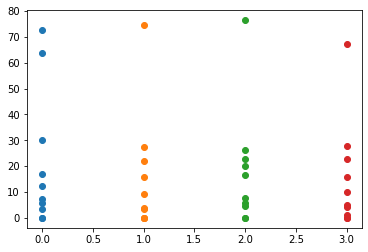

In [73]:
test = shrub.iloc[0:10]
print(test)
import matplotlib.pyplot as plt

#test.plot

#plt.scatter(test)
cols =list(test.columns.values)
#print(test[cols[0]])
for i in range(0,len(cols)):
    #plt.scatter(i, test[cols[i]])
    print(i)
    plt.scatter([i]*len(test[cols[i]]), test[cols[i]])
    #[xe] * len(ye)

In [4]:
for i in range(len(classes)):
    print(classes[i])

tree
shrub
grassland
crops
urban_built_up
bare
water


In [5]:
# energy = unary + no_change
print(pred2015["tree"][1])
print(pred2016["tree"][1])
print(pred2017["tree"][1])
print(pred2018["tree"][1])


61.7647058823529
51.6129032258064
20.0
20.0


In [81]:
# Discrete

# Build dictionary for transition probability matrix
mc_example = {classes[0]: [0.7,.05,.05,.05,.05,.05,.05],
              classes[1]: [.05,0.7,.05,.05,.05,.05,.05],
              classes[2]: [.05,.05,0.7,.05,.05,.05,.05],
              classes[3]: [.05,.05,.05,0.7,.05,.05,.05],
              classes[4]: [.05,.05,.05,.05,0.7,.05,.05],
              classes[5]: [.05,.05,.05,.05,.05,0.7,.05],
              classes[6]: [.05,.05,.05,.05,.05,.05,0.7],}


mc = pd.DataFrame(data = mc_example, index = classes)

mc

,tree,shrub,grassland,crops,urban_built_up,bare,water
tree,0.70,0.05,0.05,0.05,0.05,0.05,0.05
shrub,0.05,0.70,0.05,0.05,0.05,0.05,0.05
grassland,0.05,0.05,0.70,0.05,0.05,0.05,0.05
crops,0.05,0.05,0.05,0.70,0.05,0.05,0.05
urban_built_up,0.05,0.05,0.05,0.05,0.70,0.05,0.05
bare,0.05,0.05,0.05,0.05,0.05,0.70,0.05
water,0.05,0.05,0.05,0.05,0.05,0.05,0.70


In [88]:
# Build more realistic transition matrix
mc_example = {classes[0]: [0.9,.01,.01,.01,.01,.01,.01],
              classes[1]: [.01,0.9,.03,.01,.01,.01,.01],
              classes[2]: [.01,.03,0.9,.02,.01,.02,.01],
              classes[3]: [.05,.01,.02,0.9,.01,.04,.01],
              classes[4]: [.01,.01,.01,.01,0.94,.01,.01],
              classes[5]: [.01,.03,.02,.04,.01,0.9,.01],
              classes[6]: [.01,.01,.01,.01,.01,.01,0.94],}


mc = pd.DataFrame(data = mc_example, index = classes)

mc

,tree,shrub,grassland,crops,urban_built_up,bare,water
tree,0.90,0.01,0.01,0.05,0.01,0.01,0.01
shrub,0.01,0.90,0.03,0.01,0.01,0.03,0.01
grassland,0.01,0.03,0.90,0.02,0.01,0.02,0.01
crops,0.01,0.01,0.02,0.90,0.01,0.04,0.01
urban_built_up,0.01,0.01,0.01,0.01,0.94,0.01,0.01
bare,0.01,0.01,0.02,0.04,0.01,0.90,0.01
water,0.01,0.01,0.01,0.01,0.01,0.01,0.94


In [87]:
# Simple Markov chain

# 1st
sim = []
sim.append(mc.iloc[0].index[0])
print(sim)

# 2nd
new = np.random.choice(mc.iloc[0].index, p = mc.iloc[0])
sim.append(new)
#print(sim)

# 3rd to 10th
while len(sim) < 10:
    print(new)
    new = np.random.choice(mc.iloc[mc.index.get_loc(new)].index, p = mc.iloc[mc.index.get_loc(new)])
    sim.append(new)

print(sim)

['tree']
tree
crops
crops
tree
shrub
grassland
grassland
grassland
['tree', 'tree', 'crops', 'crops', 'tree', 'shrub', 'grassland', 'grassland', 'grassland', 'grassland']


In [1]:
import fiona
import geopandas as gpd


In [76]:
# Read in IIASA Change data 
# Required to train transition probability matrix
#test = gpd.read_file("../data/processed/IIASAchangeHarmonics.gpkg")
#df = pd.DataFrame(test.drop(columns='geometry'))
#df

df = pd.read_csv("../data/processed/IIASAchangeMerged.csv")
df2015 = df.loc[df['reference_year'] == 2015]
df2016 = df.loc[df['reference_year'] == 2016]
df2017 = df.loc[df['reference_year'] == 2017]
df2018 = df.loc[df['reference_year'] == 2018]

df2015
df2015[df2015.columns.intersection(classes)]

,bare,crops,grassland,shrub,tree,urban_built_up,water
0,0.0,0.0,9.0,50.0,41.0,0.0,0.0
4,27.0,63.0,4.0,0.0,0.0,6.0,0.0
8,0.0,0.0,0.0,0.0,100.0,0.0,0.0
12,1.0,0.0,93.0,0.0,6.0,0.0,0.0
16,0.0,0.0,41.0,0.0,59.0,0.0,0.0
...,...,...,...,...,...,...,...
134391,2.0,98.0,0.0,0.0,0.0,0.0,0.0
134395,0.0,0.0,15.0,0.0,85.0,0.0,0.0
134399,2.0,0.0,33.0,0.0,65.0,0.0,0.0
134403,0.0,0.0,75.0,0.0,25.0,0.0,0.0
